11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
k = 1, accuracy = 0.9691
k = 2, accuracy = 0.9627
k = 3, accuracy = 0.9705
k = 4, accuracy = 0.9682
k = 5, accuracy = 0.9688
k = 6, accuracy = 0.9677
k = 7, accuracy = 0.9694
k = 8, accuracy = 0.9670
k = 9, accuracy = 0.9659
k = 10, accuracy = 0.9665


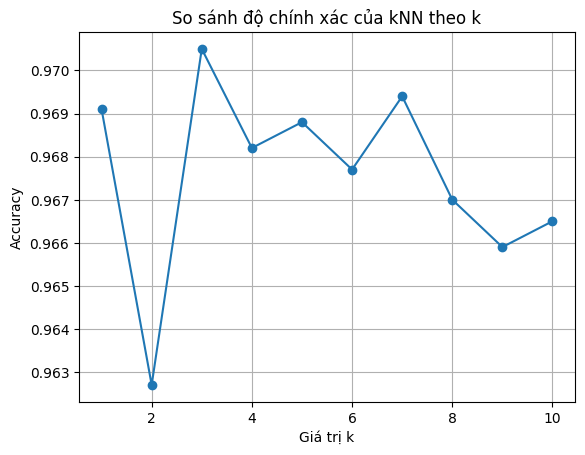

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_flat = X_train.reshape(-1, 784) / 255.0
X_test_flat = X_test.reshape(-1, 784) / 255.0


k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_pred = knn.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, accuracy = {acc:.4f}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Giá trị k")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác của kNN theo k")
plt.grid(True)
plt.show()


Train mô hình với k = 3

In [7]:
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
import pickle  # Để lưu mô hình nếu cần

# Tải dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Làm phẳng ảnh từ (28, 28) → (784,) và chuẩn hóa pixel về [0, 1]
X_train_flat = X_train.reshape(-1, 784) / 255.0
X_test_flat = X_test.reshape(-1, 784) / 255.0

# Khởi tạo mô hình kNN với k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn.fit(X_train_flat, y_train)

print("Đã huấn luyện mô hình kNN với k = 3 thành công.")


Đã huấn luyện mô hình kNN với k = 3 thành công.


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
import pickle
with open("/content/drive/MyDrive/AI/knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

print("Đã lưu mô hình vào Google Drive.")

Đã lưu mô hình vào Google Drive.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Dự đoán nhãn cho tập test
y_pred = knn.predict(X_test_flat)

# Độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

# Báo cáo chi tiết precision, recall, f1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.9705
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



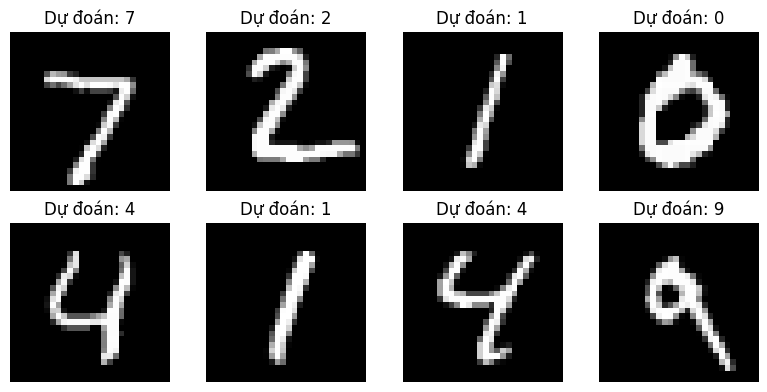

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị 8 ảnh đầu tiên cùng nhãn dự đoán
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Dự đoán: {y_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Đã load mô hình k=3.


Saving 9.png to 9 (1).png
Saving 8.png to 8 (1).png


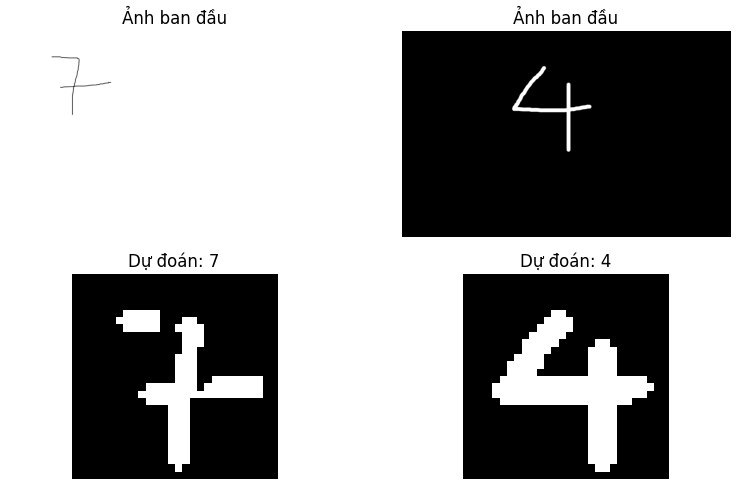

In [9]:
# Import thư viện xử lý ảnh, số học, hiển thị, upload và model
import cv2                      # Thư viện xử lý ảnh
import numpy as np              # Tính toán ma trận
import matplotlib.pyplot as plt # Hiển thị hình ảnh
from google.colab import files  # Upload ảnh từ máy lên Colab
import pickle                   # Đọc file model .pkl
from scipy.signal import find_peaks  # Tìm đỉnh trong histogram

# ===== Load mô hình kNN đã huấn luyện =====
with open("/content/drive/MyDrive/AI/knn_model_manh.pkl", "rb") as f:
    knn_model = pickle.load(f)
print("Đã load mô hình k=3.")

# ===== Upload ảnh từ người dùng =====
uploaded = files.upload()

# ===== Hàm xử lý ảnh đầu vào (chuẩn hóa để phù hợp MNIST) =====
def preprocess_color_image(file_name):
    img_color = cv2.imread(file_name)                      # Đọc ảnh màu gốc
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)     # Chuyển sang ảnh xám

    # ===== Quyết định có nên đảo màu hay không dựa vào histogram =====
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])     # Tính histogram ảnh xám
    hist_smoothed = cv2.GaussianBlur(hist, (9, 1), 0).flatten() # Làm mượt histogram để ổn định hơn

    # Tìm các đỉnh trong histogram (đại diện cho vùng nền và vùng chữ)
    peaks, _ = find_peaks(hist_smoothed, distance=20, height=100)
    if len(peaks) >= 2:
        # Chọn hai đỉnh cao nhất
        p1, p2 = sorted(peaks, key=lambda x: hist_smoothed[x], reverse=True)[:2]
        low_mean, high_mean = sorted([p1, p2])
        # Nếu không có sự khác biệt rõ giữa nền và chữ → đảo màu
        if high_mean - low_mean < 40 or high_mean < low_mean:
            gray = 255 - gray  # Đảo màu (nền trắng, chữ đen)

    # ===== Làm mượt + Tăng tương phản (CLAHE) =====
    gray_denoised = cv2.fastNlMeansDenoising(gray, None, h=20)     # Lọc nhiễu
    gray_norm = cv2.normalize(gray_denoised, None, 0, 255, cv2.NORM_MINMAX)  # Chuẩn hóa độ sáng
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))    # Tăng tương phản cục bộ
    gray_contrast = clahe.apply(gray_norm)                         # Ảnh xám tăng tương phản

    # ===== Threshold thích nghi để phân tách chữ ra nền =====
    adaptive = cv2.adaptiveThreshold(
        gray_contrast, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Phân ngưỡng theo Gaussian cục bộ
        cv2.THRESH_BINARY_INV,           # Đảo màu (chữ trắng, nền đen)
        blockSize=15, C=4                # Tham số ngưỡng
    )

    # ===== Làm sạch hình ảnh bằng kỹ thuật hình thái học (morphology) =====
    combined = cv2.medianBlur(adaptive, 3)  # Lọc median để loại bỏ nhiễu lẻ

    if np.mean(combined) < 25:
        # Nếu ảnh quá mờ (chữ mảnh) → làm rõ nét bằng dilation + closing
        kernel = np.ones((3, 3), np.uint8)
        combined = cv2.dilate(combined, kernel, iterations=2)
        combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel)

        # Giữ lại contour lớn nhất (bỏ nhiễu nhỏ)
        contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            largest = max(contours, key=cv2.contourArea)
            mask = np.zeros_like(combined)
            cv2.drawContours(mask, [largest], -1, 255, thickness=cv2.FILLED)
            combined = mask

    # Làm đậm nét lần nữa với kernel lớn hơn
    kernel2 = np.ones((5, 5), np.uint8)
    combined = cv2.dilate(combined, kernel2, iterations=1)
    combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel2)

    # ===== Cắt và resize ảnh về đúng kích thước 28x28 =====
    def crop_digit_with_padding(image, padding=4):
        coords = cv2.findNonZero(image)
        if coords is None:
            return np.zeros((28, 28), dtype=np.uint8)
        x, y, w, h = cv2.boundingRect(coords)
        x, y = max(x - padding, 0), max(y - padding, 0)
        w, h = w + 2 * padding, h + 2 * padding
        return image[y:y+h, x:x+w]

    digit = crop_digit_with_padding(combined)
    resized = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_CUBIC)  # Resize về 20x20

    # ===== Căn giữa chữ số trong khung 28x28 dựa theo trọng tâm =====
    def center_image(image):
        M = cv2.moments(image)
        cx, cy = (10, 10) if M["m00"] == 0 else (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
        canvas = np.zeros((28, 28), dtype=np.uint8)
        x_offset, y_offset = 14 - cx, 14 - cy
        for y in range(20):
            for x in range(20):
                ny, nx = y + y_offset, x + x_offset
                if 0 <= ny < 28 and 0 <= nx < 28:
                    canvas[ny, nx] = image[y, x]
        return canvas

    final_img = center_image(resized)
    final_img = cv2.GaussianBlur(final_img, (3, 3), 0)                 # Làm mượt lại một chút
    _, final_img = cv2.threshold(final_img, 30, 255, cv2.THRESH_BINARY)  # Nhị phân hóa lần cuối

    return img_color, final_img  # Trả về ảnh gốc và ảnh xử lý

# ===== Xử lý và dự đoán =====
originals, processed, predictions = [], [], []

for file_name in uploaded.keys():
    original_img, processed_img = preprocess_color_image(file_name)
    originals.append(original_img)
    processed.append(processed_img)

    img_flat = processed_img.reshape(1, -1) / 255.0  # Chuyển về vector 1D
    pred = knn_model.predict(img_flat)[0]            # Dự đoán
    predictions.append(pred)

# ===== Hiển thị ảnh và kết quả dự đoán =====
num_images = len(originals)
cols = min(4, num_images)
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 5))
if rows == 1:
    axes = np.expand_dims(axes, 0)

for i in range(num_images):
    axes[0, i].imshow(cv2.cvtColor(originals[i], cv2.COLOR_BGR2RGB))
    axes[0, i].set_title("Ảnh ban đầu")
    axes[0, i].axis('off')

    axes[1, i].imshow(processed[i], cmap='gray')
    axes[1, i].set_title(f"Dự đoán: {predictions[i]}")
    axes[1, i].axis('off')

for i in range(num_images, cols):
    axes[0, i].axis('off')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
